In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from get_circuit_properties import get_circuit_properties, count_swap
from c_if_sampler_TEST_layering_SWAPs import get_circuit_sampler_layered as get_circuit_swaps
from c_if_sampler_TEST_layering import get_circuit_sampler_layered
from efficient_circuit_markovian_CHAIN import create_markovian_circuit

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-ikerbasque/upv-ehu/dynamics-of-mole',
    token='8b44f1c0867c1a11e554cae2f6201ed52dcd07edff18e845fed56d899f3992a9f773c47aab0332d767425d6f57f3ee862f5d3b330ae3cc971e5f9e741206fe7b'
)

real_backend = service.backend('ibm_fez')

omega_c = 1.1

nt_tqd = {'estimator' : []}

n_emitters = [2,3,4,5,10,15,20,25]

for n in n_emitters:
    
    kappa = [0.2]
    omega_m = [1.1]*n
    g = [0.01]*(2*(n-1))
    gamma = [0.8*(10**-6)]*n
    initial_state = [0]*(2**n)
    initial_state[0] = 1

    r = 1

    estimator_qc = create_markovian_circuit(n, omega_m, omega_c, g, gamma, kappa, initial_state, r)
    properties = get_circuit_properties(estimator_qc.decompose().decompose())

    counter = 0

    for key in nt_tqd:

        nt_tqd[key].append([properties['two qubit depth']])
        
    print(f'n = {n} done!')

n = 2 done!
n = 3 done!
n = 4 done!
n = 5 done!
n = 10 done!
n = 15 done!
n = 20 done!
n = 25 done!


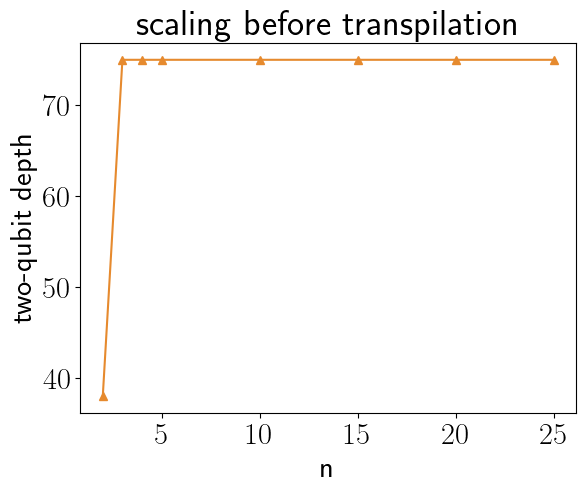

In [25]:
from generate_complementary_colors import generate_complementary_colors
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 700
plt.rcParams.update({'font.size': 22})

import numpy as np

colors = generate_complementary_colors(6, palette_type = 'default', start_color = 'hotpink')

linestyles = {'c_if_ancilla_layered_layout' : 'solid', 'estimator' : 'solid', 'v4 + SWAPs' : 'solid'}
markers = {'c_if_ancilla_layered_layout' : '^', 'estimator' : '^', 'v4 + SWAPs' : '^'}
colors = {'c_if_ancilla_layered_layout' : colors[4], 'estimator' : colors[1], 'v4 + SWAPs' : colors[5]}
labels = {'c_if_ancilla_layered_layout' : 'v4', 'estimator' : 'Original version', 'v4 + SWAPs' : 'v4 + SWAPs' }

for key in nt_tqd:

    plt.plot(n_emitters, nt_tqd[key], color = colors[key], marker = markers[key], linestyle = linestyles[key], label = labels[key])
    
plt.xlabel('n')
plt.ylabel('two-qubit depth')
plt.xticks([5,10,15,20,25])
#plt.yscale('log')
plt.title('scaling before transpilation')
#plt.legend(loc='center right', fontsize='small')
plt.savefig('scaling of the 2qd for the untranspiled qc', bbox_inches='tight')
plt.show()  

In [3]:
from qutip import sigmap, sigmam

sigmap()*sigmam()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]

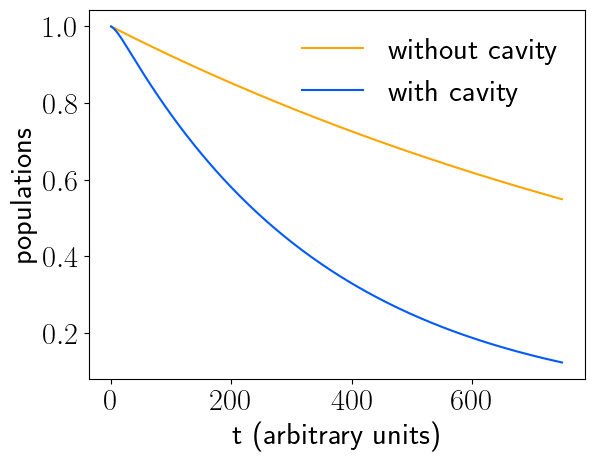

In [2]:
from qutip import tensor, qeye, Qobj, basis, sigmap, sigmam, destroy, mesolve
import numpy as np

t = np.linspace(0,750,250)
initial_emitter = basis(2, 0)
initial_cavity = basis(2, 0)
omega_c = 1.1
omega_m = 1.1
#g = 0.01
g = 0.01
kappa = 0.2
gamma = 0.8*(10**-3)
#gamma = 0

h_alone = omega_m*sigmap()*sigmam()

h_with_cavity = omega_m*tensor(sigmap()*sigmam(), qeye(2)) + omega_c*tensor(qeye(2), destroy(2).dag()*destroy(2)) + g*(tensor(destroy(2).dag(), sigmam()) + tensor(destroy(2), sigmap()))

rho0_alone = initial_emitter
rho0_together = tensor(initial_emitter, initial_cavity)

c_op_alone = [np.sqrt(gamma)*sigmam()]
c_op_with_cavity = [np.sqrt(gamma)*tensor(sigmam(), qeye(2)), np.sqrt(kappa)*tensor(qeye(2), destroy(2))]

obs_alone = sigmap()*sigmam()
obs_together = [tensor(sigmap()*sigmam(), qeye(2)), tensor(qeye(2), destroy(2).dag()*destroy(2))]

evs_alone = mesolve(h_alone, rho0_alone, t, c_op_alone, obs_alone)
evs_together = mesolve(h_with_cavity, rho0_together, t, c_op_with_cavity, obs_together)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 700
plt.rcParams.update({'font.size': 22})
from generate_complementary_colors import generate_complementary_colors

colors = generate_complementary_colors(2, 'neon', 'orange')

plt.plot(t, evs_alone.expect[0], linestyle = 'solid', color = colors[int(0)])
plt.plot(t, evs_together.expect[0], linestyle = 'solid', color = colors[int(1)])
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = colors[int(0)], label = 'without cavity')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = colors[int(1)], label = 'with cavity')
plt.xlabel('t (arbitrary units)')
plt.ylabel('populations')
plt.legend(frameon=False)
plt.savefig('emission enhancement', bbox_inches='tight')
plt.show()

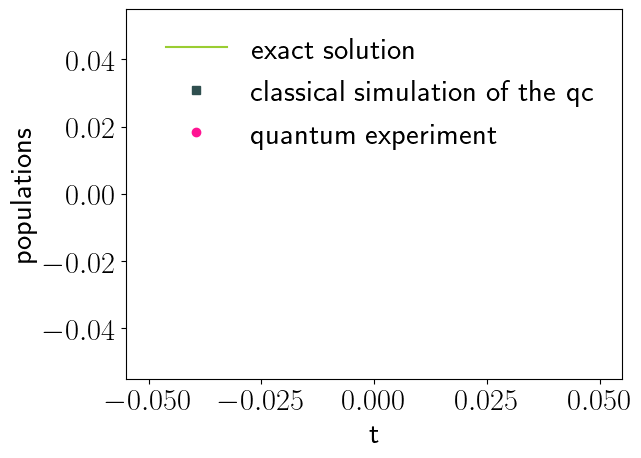

In [4]:
import matplotlib.colors as mcolors
plt.rcParams.update({'font.size': 22})
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'yellowgreen', label = 'exact solution')
plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 's', color = 'darkslategrey', label = 'classical simulation of the qc')
plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o', color = 'deeppink', label = 'quantum experiment')
plt.xlabel('t')
plt.ylabel('populations')
plt.legend(frameon=False)
plt.savefig('legend spontaneous emission', bbox_inches='tight')
plt.show()

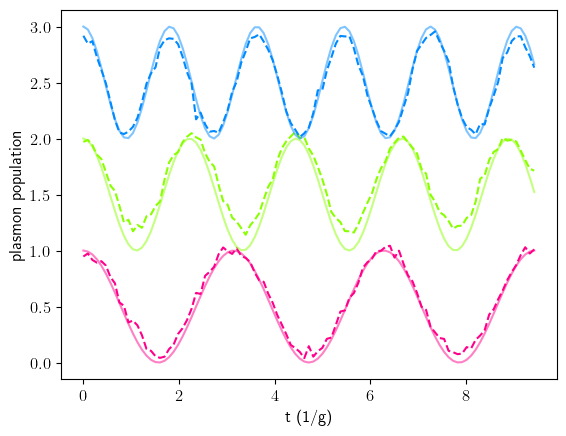

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import colorsys
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 12})
from generate_complementary_colors import generate_complementary_colors

t = np.loadtxt('quantum_simulation.txt', usecols=0)
one_p = np.loadtxt('quantum_simulation_2.txt', usecols=1)
two_p = np.loadtxt('quantum_simulation_2.txt', usecols=2)
three_p = np.loadtxt('quantum_simulation_2.txt', usecols=3)

classical_one = np.loadtxt('classical_simulation.txt', usecols=1)
classical_two = np.loadtxt('classical_simulation.txt', usecols=2)
classical_three = np.loadtxt('classical_simulation.txt', usecols=3)

colors = generate_complementary_colors(3, 'neon', 'deeppink')


plt.plot(t, one_p, linestyle = 'dashed', color = colors[0])
plt.plot(t, classical_one, linestyle = 'solid', color = colors[0], alpha = 0.5)
plt.plot(t, two_p, linestyle = 'dashed', color = colors[1])
plt.plot(t, classical_two, linestyle = 'solid', color = colors[1], alpha = 0.5)
plt.plot(t, three_p, linestyle = 'dashed', color = colors[2])
plt.plot(t, classical_three, linestyle = 'solid', color = colors[2], alpha = 0.5)

#plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o',color = colors[0], label = 'one excitation')
#plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o',color = colors[1], label = 'two excitations')
#plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o', color = colors[2], label = 'three excitations')
#plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'Quantum experiment')
#plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'Exact solution')
plt.xlabel('t (1/g)')
plt.ylabel('plasmon population')
#plt.yscale('log')
#plt.title(key)
#plt.legend(frameon=False)
#plt.savefig('markovian circuit for %s' %key)
plt.savefig('different splittings', bbox_inches='tight')
plt.show()

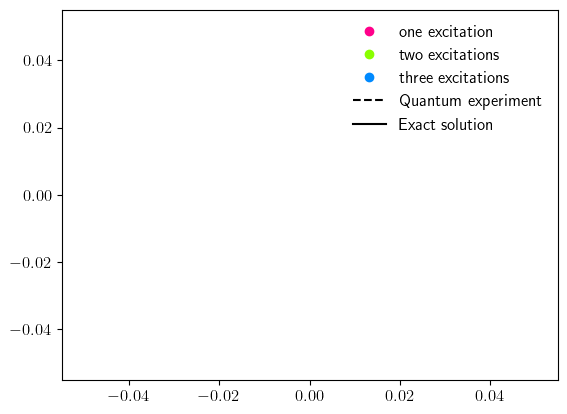

In [8]:
plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o',color = colors[0], label = 'one excitation')
plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o',color = colors[1], label = 'two excitations')
plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = 'o', color = colors[2], label = 'three excitations')
plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'Quantum experiment')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'Exact solution')
plt.legend(frameon=False)
plt.savefig('legend different splittings', bbox_inches='tight')
plt.show()